# IRIS FLOWER CLASSIFICATION

**Problem Statement**

1.The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their measurements.Now imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.

2.Use the Iris dataset to develop a model that can classify iris flowers into different speccies based on their and petal measurements. This dataset is widely used for introductory classification tasks.

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
# Loading the dataset
iris=pd.read_csv('IRIS.csv')

### Data pre-processing

In [3]:
# To check number of rows and columns
iris.shape
print("Rows = ",iris.shape[0])
print("Columns = ",iris.shape[1])

Rows =  150
Columns =  5


In [4]:
# To get infomation about the data
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Describe data
iris.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [6]:
# Show columns
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
# Checking missing values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
print(iris.groupby("species").size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data Visualization

Text(0.5, 1.0, 'Sepal length')

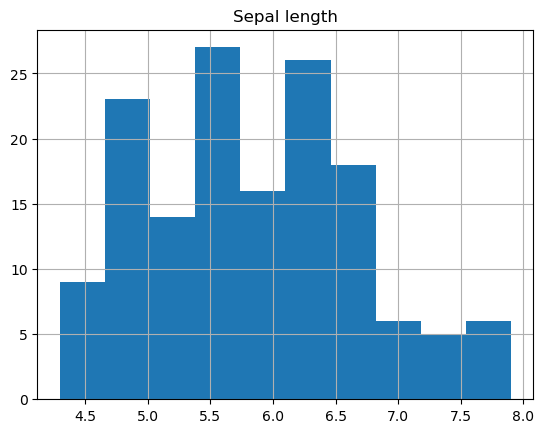

In [10]:
# Visual representation

iris['sepal_length'].hist()
plt.title('Sepal length')

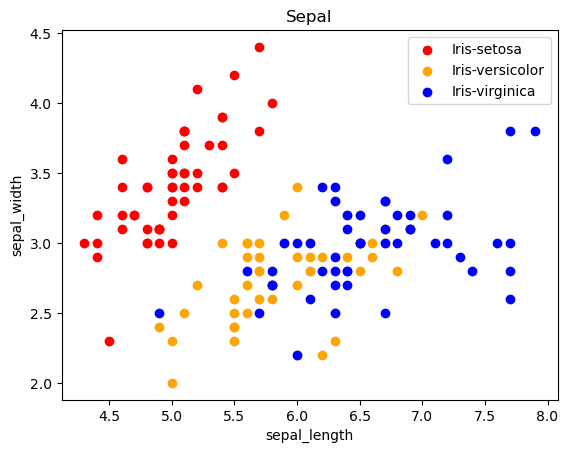

In [11]:
# Scatter plot
colors=['red','orange','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

for i in range(3):
    x=iris[iris['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Sepal')
plt.legend()

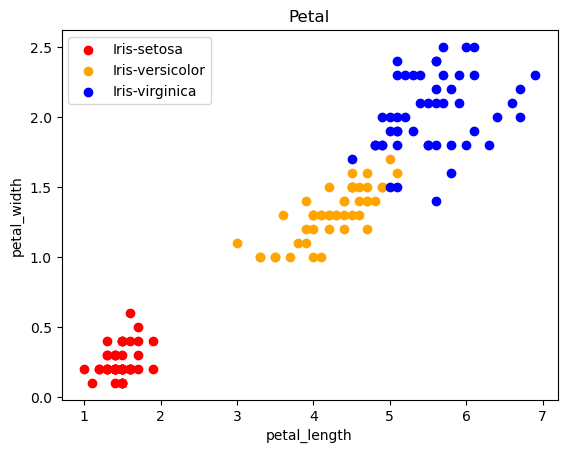

In [12]:
colors=['red','orange','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

for i in range(3):
    x=iris[iris['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Petal')
plt.legend()

<function matplotlib.pyplot.show(close=None, block=None)>

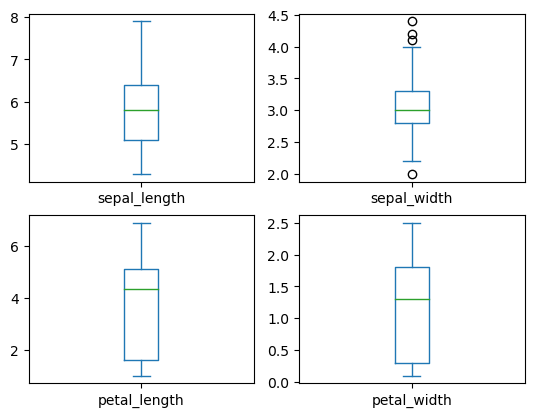

In [13]:
iris.plot(kind='box', subplots=True, layout=(2,2), sharex = False, sharey=False)
plt.show

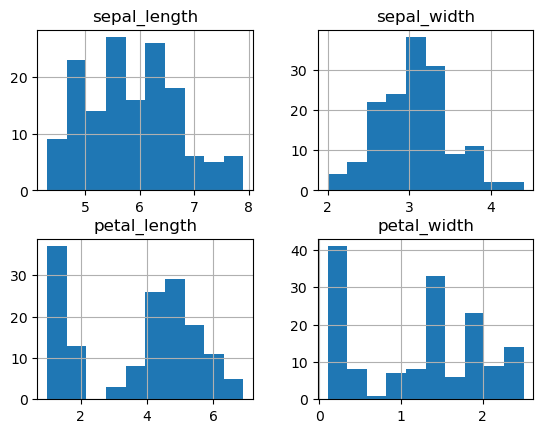

In [14]:
iris.hist()
plt.show()

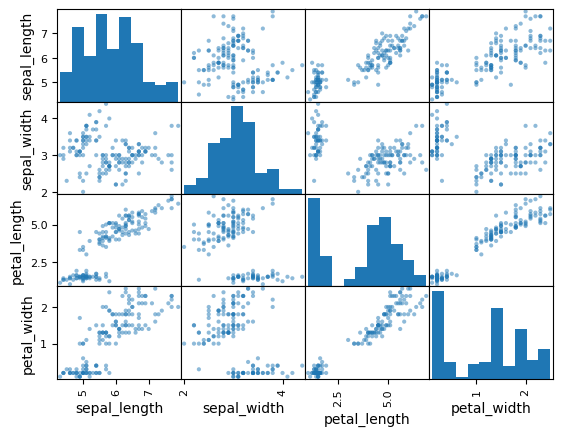

In [15]:
scatter_matrix(iris)
plt.show()

In [16]:
# coorelation matrix
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

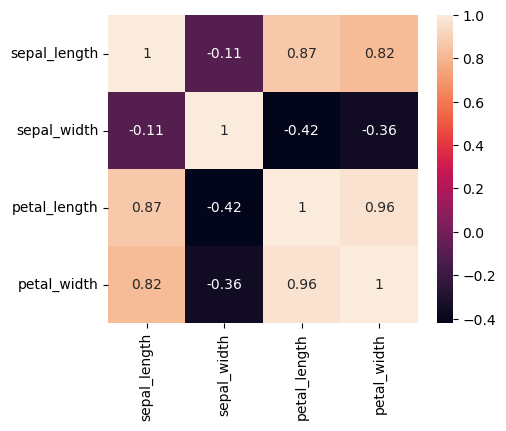

In [17]:
Corr=iris.corr()
fig, ax=plt.subplots(figsize=(5,4))
sns.heatmap(Corr, annot=True, ax=ax)

In [18]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
# Assuming you have loaded the 'iris' dataset
X = iris.drop(columns=['species'])
Y = iris['species']

**Split into train and test data**

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [21]:
print(X.shape,X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(150, 4) (120, 4) (30, 4) (120,) (30,)


**Model training**

In [22]:
model=KNeighborsClassifier()

In [23]:
model.fit(X_train, Y_train)

KNeighborsClassifier()

**Model Evaluation**

In [24]:
# accuracy on training data
X_train_prediction=model.predict(X_train)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [25]:
print(X_train_prediction)

['Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 

In [26]:
training_data_accuracy =accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data :{:.2f}%'.format(training_data_accuracy*100 ))

Accuracy score of training data :95.83%


In [27]:
# Accuracy on test data
X_test_prediction =model.predict(X_test)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [28]:
print(X_test_prediction)

['Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica']


In [29]:
testing_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print('Accuracy score of testing data :{:.2f}%'.format(testing_data_accuracy*100 ))

Accuracy score of testing data :100.00%


#### Classification Report : It consists of precision, recall, F1 score

In [30]:
confusion_matrix(Y_test,X_test_prediction)

array([[14,  0,  0],
       [ 0,  8,  0],
       [ 0,  0,  8]], dtype=int64)

In [31]:
print(classification_report(Y_test,X_test_prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



**Conclusion**

The KNN(K- Nearest Neighbors) algorithm is simple yet effective classification method.It predicts the class label of new data point with full accuracy. This model is effective for given Iris flower dataset